In [1]:
#pip install geopandas

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

In [4]:
data = pd.read_csv("daft.csv")

In [5]:
data.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


#### Data Explanation

#### Data Source : Daft.ie
* id: Property listing id used in the website
* title: property address.
* featuredLevel: ['featured' 'premium' 'standard']
* publishDate: published date for the listing.
* price: house price.
* numBedrooms: No. of bedrooms.
* numBathrooms: No. of bathroom.
* propertyType: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow' 
'Townhouse' 'Duplex' 'Site' 'Studio' 'House'.
* propertySize: Size of the property in meters squared
* category: ['Buy' 'New Homes'] (Buy means the houses listed under Buy menu in the websites)
* AMVprice: Advised minimum value (some properties have AMV price. The price column was mixed with regular price and AMV price, created a new column for AMV price to flag if it is AMV or not.)
* sellerId: Seller's Id
* sellername: Seller's name
* sellerbranch: Seller's branch if it is an agency.
* sellerType: ['BRANDEDAGENT' 'UNBRANDEDAGENT' 'PRIVATEUSER']
* m_totalImages: Total images posted on the website.
* m_hasVideo: Whether the property posted a video or not.
* m_hasVirtualTour: Whether the property has a virtual tour or not.
* m_hasBrochure: Whether the property has a brochure or not.
* longitude: Coordinate
* latitude: Coordinate
* ber_rating: ['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI666' 'F' 'E2' 'B2' 'XXX', 'A2,''B1' 'A1' 'A1A2']
(XXX means the rating was missing)
] 

#### Quick peek into the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


#### Categorical Data
* featuredLevel, propertyType, category,  sellerType, seller_branch, seller_name, ber_rating, title, id, sellerId, m_hasVideo, m_hasBrochure, m_hasVirtualTour             
#### Numerical Data
Continouous:
* price, numBedrooms, numBathrooms, latitude, longitude, m_totalImages, AMV_price, , propertySize.

Disrete:
* publishDate

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3967.0,3.629047e+06,250247.854757,10921.000000,3.654066e+06,3.673795e+06,3.685990e+06,3.695402e+06
price,3967.0,3.416734e+05,270358.241779,20000.000000,1.950000e+05,2.750000e+05,3.950000e+05,4.500000e+06
numBedrooms,3967.0,3.126292e+00,1.230570,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,2.300000e+01
numBathrooms,3967.0,2.077136e+00,1.167772,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.300000e+01
propertySize,3612.0,1.326739e+02,295.246580,1.000000,7.800000e+01,1.030000e+02,1.370000e+02,8.600000e+03
AMV_price,3967.0,4.739098e-02,0.212500,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sellerId,3967.0,2.163815e+04,254150.598747,7.000000,2.178000e+03,3.255000e+03,8.806000e+03,5.310328e+06
m_totalImages,3967.0,1.844895e+01,10.537226,0.000000,1.200000e+01,1.700000e+01,2.300000e+01,1.040000e+02
longitude,3967.0,-7.389964e+00,1.865587,-100.445882,-8.426627e+00,-7.050391e+00,-6.298945e+00,-6.028016e+00
latitude,3967.0,5.313382e+01,0.716435,39.783730,5.266612e+01,5.330335e+01,5.343872e+01,5.529969e+01


#### Checking for Null Values

In [8]:
for i in data[data.columns[data.isnull().any()]].columns:
    print('- ',i)

-  propertySize


#### propertySize is missing around 355 values, which is around 10% of the total, hence dropping the records will impact the performance of our model therefore we need to fill the missing values with the median value.
If the data is heavily skewed or has outliers, the median is a better choice as it is robust to extreme values. The median represents the middle value and is less influenced by extreme observations.

In [9]:
median_value = data['propertySize'].median() 
data['propertySize'].fillna(value=median_value, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3967 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


#### Price Distribution

<Figure size 1000x600 with 0 Axes>

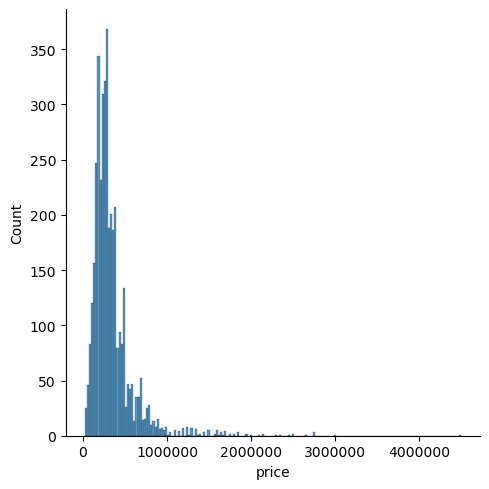

In [11]:
plt.figure(figsize=(10, 6))
sns.displot(data['price'])
plt.ticklabel_format(style='plain', axis='x')

* Majority of the house pricing is under half a million. With a few houses being nearly 3 million!
* Price is heavily right skewed

#### Price vs Size of property

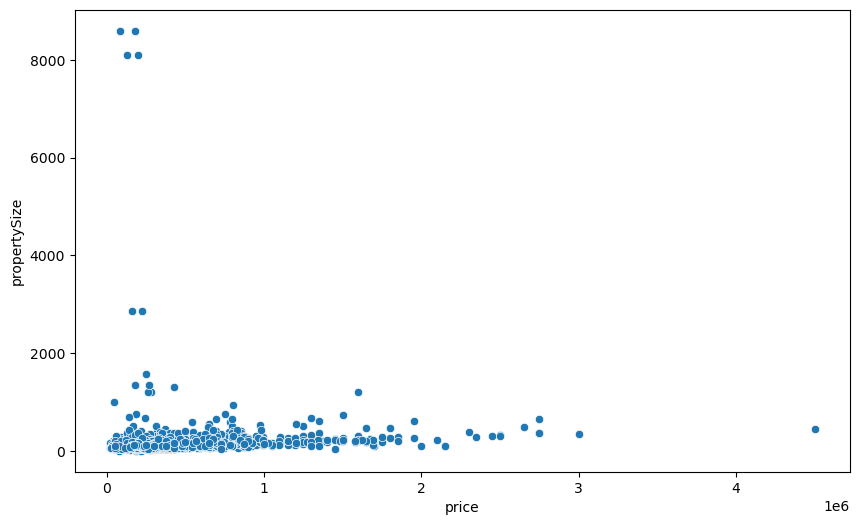

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="propertySize", data=data)
plt.ticklabel_format(style='plain', axis='y')

* In the cluster, a weak trend of increasing prices with increasing property size can be seen. However, there are few records where the property size has increased but the price is still near the lowest. This could indicate errors in the data.

#### Number of Bedrooms vs Price

<Axes: xlabel='numBedrooms', ylabel='price'>

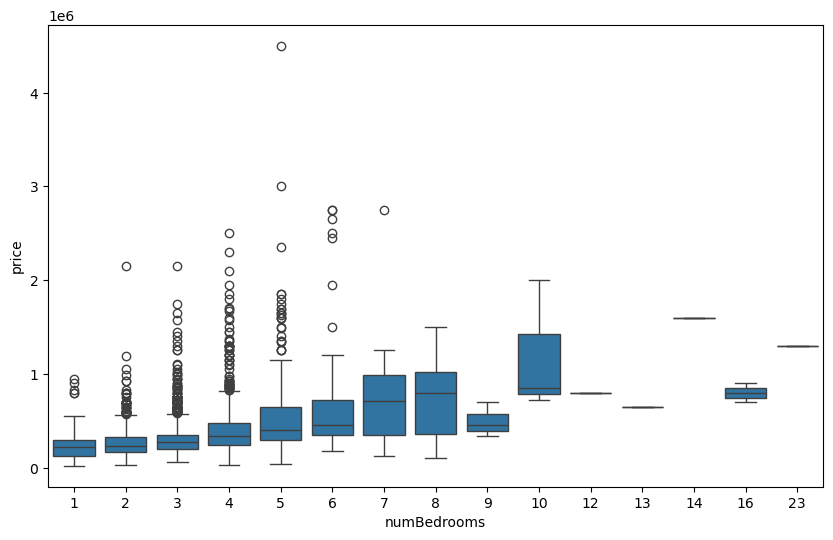

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="numBedrooms", y="price")

* We can see that the prices tend to go up with the number of bedrooms.
* The price variance in houses with lower number of bedrooms is lower as compared to the variance in prices of houses with high number of bedrooms.
* Visible values that are outside of the 75th percentile.

In [14]:
grouped_data = data.groupby('ber_rating')['price'].mean().reset_index()

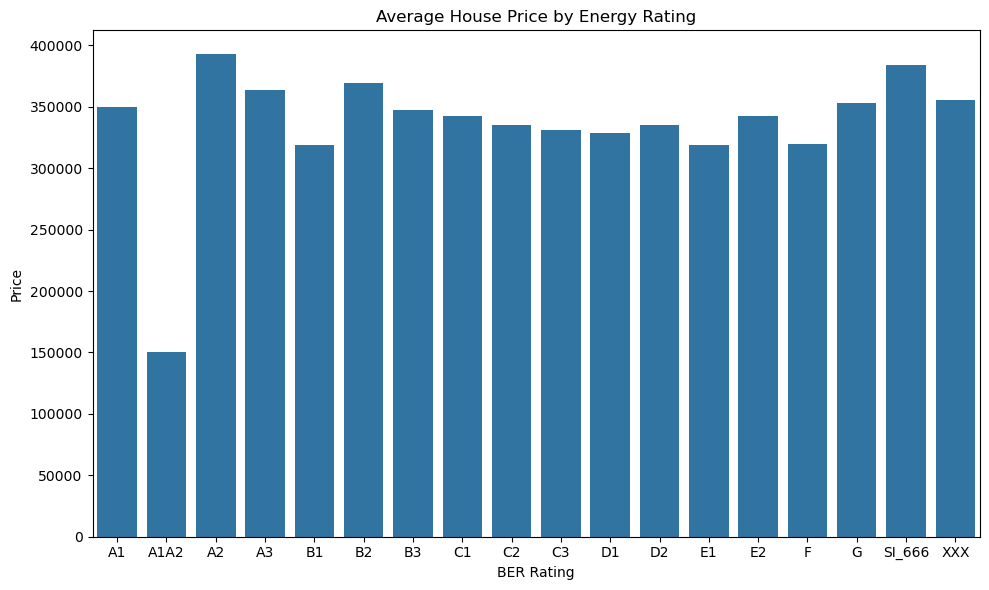

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ber_rating', y='price', data=grouped_data)
plt.xlabel('BER Rating')
plt.ylabel('Price')
plt.title('Average House Price by Energy Rating')
plt.tight_layout()

* According to https://www.seai.ie/home-energy/building-energy-rating-ber/understand-a-ber-rating , Sl_666 and XXX are possible errors.
* The average size house rating in ireland is D2, we can see that prices take a dip around this area which shows market competition.
* The price of A1A2 rated house seems lower than the average, considering A1A2 is not a real rating, this will be explored further.

#### Price Trends Respective to the Type of Property

<Axes: xlabel='propertyType', ylabel='price'>

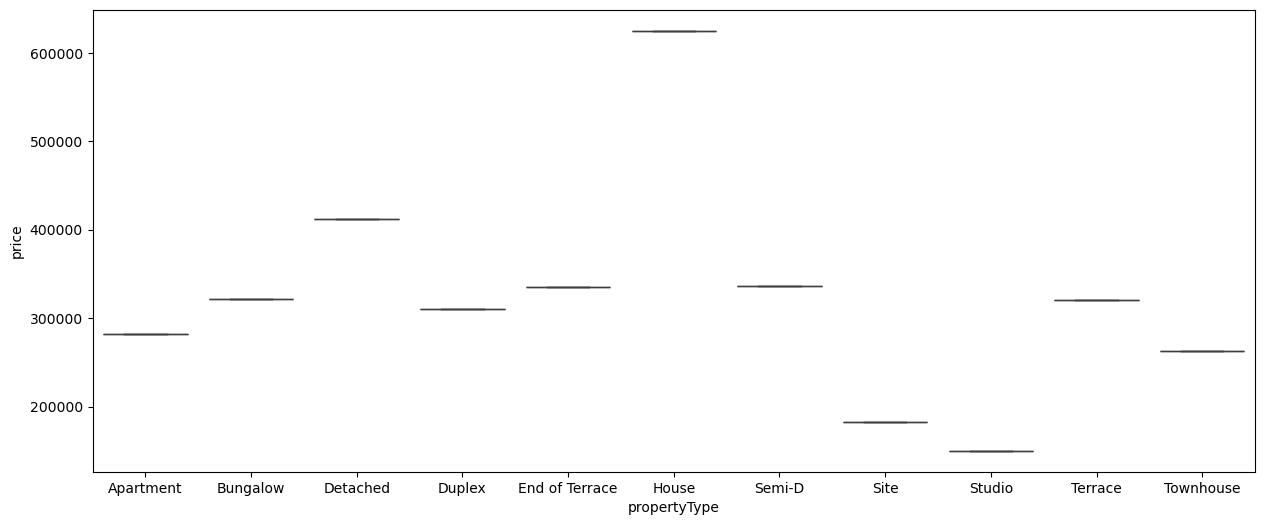

In [16]:
plt.figure(figsize=(15, 6))
grouped_data = data.groupby('propertyType')['price'].mean().reset_index()
sns.boxplot(x='propertyType',y='price',data=grouped_data)

* As per daft.ie, a 'House' is any property irrelevant of its type. Following this, the average price for a 'house' should be in the middle of all other values, but in the figure above, it is the highest averaging type, which shows the presence of outliers.
* Detached houses are the most costly, whereas studios are the cheapest to buy.

#### Biggest Market Share By Investor

In [17]:
grouped_data = data.groupby('seller_branch')['price'].sum().reset_index()
grouped_data = grouped_data.sort_values(by=['price'], ascending=False)
top_5 = grouped_data.head(5)

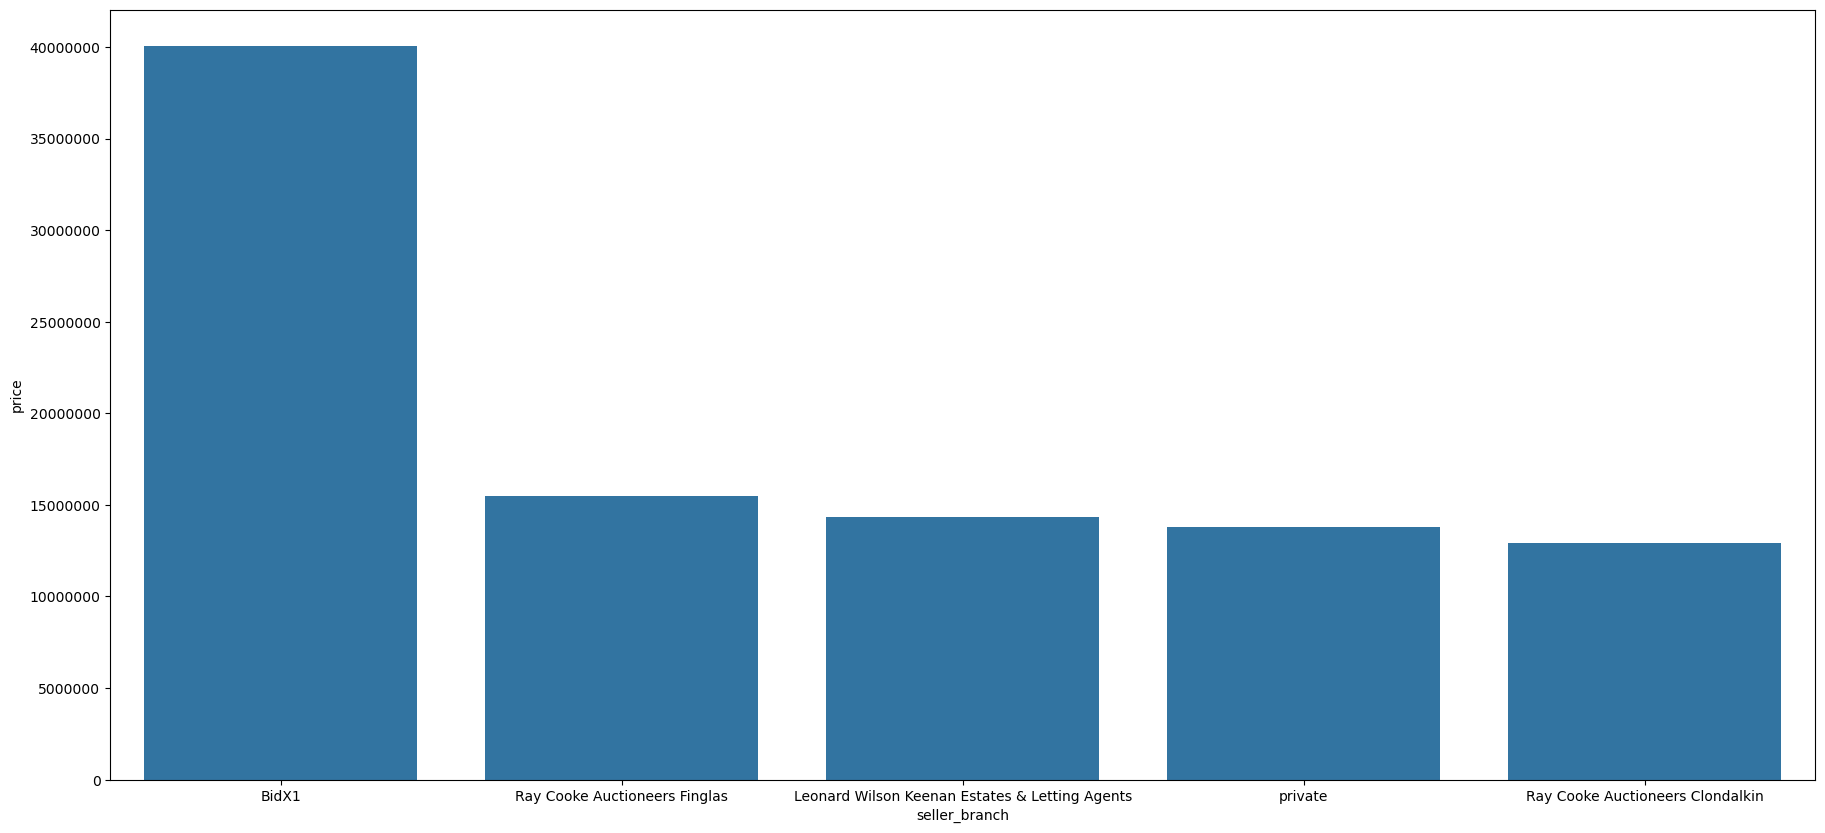

In [18]:
plt.figure(figsize=(22, 10))
sns.barplot(top_5, x="seller_branch", y="price")
plt.ticklabel_format(style='plain', axis='y')

* BidX1 has the largest market share of 40 million!
* Private owners have the 4th highest share of properties.

#### Feature Engineering

* Converting Date to DateTime and splitting into Year and Month

In [19]:
data['publishDate'] = pd.to_datetime(data['publishDate'])

In [20]:
data['year'] = data['publishDate'].dt.year
data['month'] = data['publishDate'].dt.month

data.drop(['publishDate'], axis=1, inplace = True)

* Using clustering to replace latitude and longitude with a location cluster as the co-ordinates themselves do not present any usability for ML according to the source below.

https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d

In [21]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(data[['latitude','longitude']])
data['zone'] = kmeans.predict(data[['latitude','longitude']])
data.drop(['latitude', 'longitude'], axis=1, inplace = True)

C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


* Extracting county and Town from Address.

In [22]:
def getCounty(title):
    address_parts = title.split(',')
    return address_parts[-1].strip()

In [23]:
def getTown(title):
    address_parts = title.split(',')
    return address_parts[-2].strip()

In [24]:
data['county'] = data['title'].apply(getCounty)
data['town'] = data['title'].apply(getTown)

In [25]:
data.drop(['title'], axis=1, inplace = True)

In [26]:
data['county'] = data['county'].str.replace('Co. ', '')

In [27]:
data['county'] = data['county'].str.extract(r'([a-zA-Z]+)')

In [28]:
data['town'] = data['town'].str.extract(r'([a-zA-Z]+)')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   featuredLevel     3967 non-null   object 
 2   price             3967 non-null   int64  
 3   numBedrooms       3967 non-null   int64  
 4   numBathrooms      3967 non-null   int64  
 5   propertyType      3967 non-null   object 
 6   propertySize      3967 non-null   float64
 7   category          3967 non-null   object 
 8   AMV_price         3967 non-null   int64  
 9   sellerId          3967 non-null   float64
 10  seller_name       3967 non-null   object 
 11  seller_branch     3967 non-null   object 
 12  sellerType        3967 non-null   object 
 13  m_totalImages     3967 non-null   float64
 14  m_hasVideo        3967 non-null   bool   
 15  m_hasVirtualTour  3967 non-null   bool   
 16  m_hasBrochure     3967 non-null   bool   


#### Domain Knowledge
* Dropping Advertisement ID as it is a daft.ie listing identifier and the ML model may interpret this as a mathematical input.
* Example: If a house with id 1 is priced at 200,000 and another house with id 45 is priced at 500,000 the machine learning model might
interpret this as if the id goes up, the price will also go up, which is completely incorrect. 

In [30]:
data.drop(['id'], axis=1, inplace = True)

#### Average House Price by Month

<Axes: xlabel='month'>

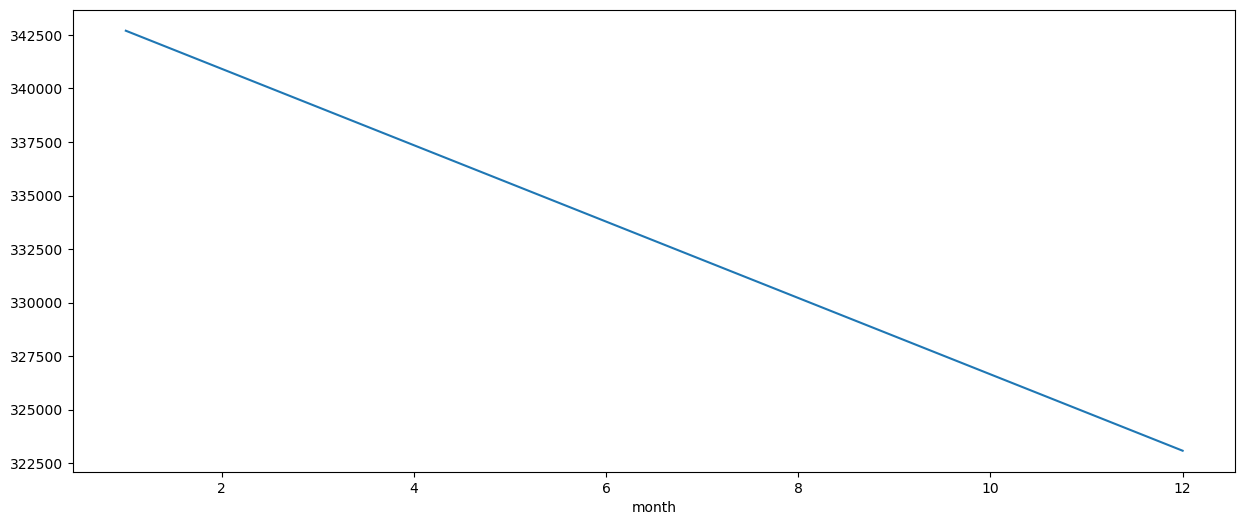

In [52]:
plt.figure(figsize=(15, 6))
data.groupby('month')['price'].mean().plot()

* Price of housing tends to fall by almost 20000 during the last month of the year. 

#### Test Train Split

https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583
* According to this study, the best test to train split ratio is the square root of number of features to 1. We have 22 features which gives us around 4.6:1 , which means the best split is 75/25.

In [32]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [33]:
train_data = X_train.join(y_train)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2975 entries, 3880 to 19
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   featuredLevel     2975 non-null   object 
 1   numBedrooms       2975 non-null   int64  
 2   numBathrooms      2975 non-null   int64  
 3   propertyType      2975 non-null   object 
 4   propertySize      2975 non-null   float64
 5   category          2975 non-null   object 
 6   AMV_price         2975 non-null   int64  
 7   sellerId          2975 non-null   float64
 8   seller_name       2975 non-null   object 
 9   seller_branch     2975 non-null   object 
 10  sellerType        2975 non-null   object 
 11  m_totalImages     2975 non-null   float64
 12  m_hasVideo        2975 non-null   bool   
 13  m_hasVirtualTour  2975 non-null   bool   
 14  m_hasBrochure     2975 non-null   bool   
 15  ber_rating        2975 non-null   object 
 16  year              2975 non-null   int32  
 17 

#### Encodings

* Emphasis has been put on keeping the dimensionality of the dataset as low as possible.
* Label encoding was tested and resulted in values being used as ordinal, therefore, other types of encoding was preffered.
* Label encoders work well only with decision tree based algorithms, where as we want to use linear models.


#### One Hot Encodings. propertyType, category, sellerType.

* Reasoning: High cardinality features result in increased memory usage due to the amount of dummy variables required to encode them which reduces the models performance. Therefore, they should be grouped based on some criteria and then encoded.
* https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

In [35]:
train_data['propertyType'].replace(['End of Terrace', 'Bungalow', 'Townhouse', 'Duplex', 'Site', 'House', 'Studio'], 'Other', inplace=True)

In [36]:
train_data  = pd.get_dummies(train_data, columns = ['propertyType'], dtype=int)

In [37]:
train_data  = pd.get_dummies(train_data, columns = ['category'], dtype=int)

In [38]:
train_data  = pd.get_dummies(train_data, columns = ['sellerType'], dtype=int)

#### Ordinal Encodings. featuredLevel, ber_rating

* Reasoning: As the cardinality is relatively lower (only 3 unique values) and the values follow a natural progression.
* According to daft.ie : standard < premium < featured.

In [39]:
featuredLevels = ['standard', 'premium', 'featured']
ber_ratings = ['XXX', 'SI_666', 'G', 'F', 'E2', 'E1', 'D2', 'D1', 'C3', 'C2', 'C1', 'B3', 'B2', 'B1', 'A3', 'A2', 'A1A2', 'A1']

encoder = OrdinalEncoder(categories=[featuredLevels, ber_ratings])
train_data[['featuredLevel', 'ber_rating']] = encoder.fit_transform(train_data[['featuredLevel', 'ber_rating']]) 

#### Target Encoding : town, county

* seller_name: Leave one out encoding
* Reasoning: As we have 1152 distinct values, LOO will calculate the mean of the target without the current data point in calculations. This prevents data leakage and there is no additional dimensionality.
* https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b#:~:text=Leave%2DOne%2DOut%20Encoding%20(,which%20belongs%20to%20that%20category.

* Leave one out encoding
* Reasoning: As we have so many distinct values, LOO will calculate the mean of the target without the current data point in calculations. This prevents data leakage and there is no additional dimensionality.
* https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b#:~:text=Leave%2DOne%2DOut%20Encoding%20(,which%20belongs%20to%20that%20category.

In [41]:
train_data['county'] = train_data['county'].where(train_data['county'].isin(['Dublin', 'Limerick', 'Kildare', 'Galway', 'Louth', 'Cork', 'Mayo', 'Westmeath', 'Wexford', 'Kerry', 'Meath', 'Donegal', 'Roscommon', 'Wicklow', 'Waterford', 'Tipperary', 'Clare', 'Laois', 'Offaly', 'Kilkenny', 'Sligo', 'Cavan', 'Carlow', 'Leitrim', 'Longford', 'Monaghan']), other='Other')

In [53]:
encoder = ce.LeaveOneOutEncoder(cols=['county'])
data_encoded = encoder.fit_transform(train_data['county'], train_data['price'])
 
train_data = train_data.merge(data_encoded, how = 'left', left_index=True, right_index=True)
train_data.drop(['county_x'], axis=1, inplace = True)

In [54]:
encoder = ce.LeaveOneOutEncoder(cols=['town'])
data_encoded = encoder.fit_transform(train_data['town'], train_data['price'])
 
train_data = train_data.merge(data_encoded, how = 'left', left_index=True, right_index=True)
train_data.drop(['town_x'], axis=1, inplace = True)

#### word2Vec embedding.  variables left: sellername, sellerbranch, 

 ---------------------------------------------------------------------- 

-----------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey",
                                                 ax=ax)
data.plot(x="longitude", y="latitude", kind="scatter", 
        c="pickup cluster", colormap="YlOrRd", 
        title="A MAP OF PROPERTIES ON SALE IN IRELAND", 
        ax=ax)
plt.show()

In [ ]:
data.info()


### Data Exploration and Preparation

* #### Data is split in the early phase so that we can analyze the performance of our model (which uses train_data).
* #### Test data will remain untouched until the very end.

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data.head()

### Feature Engineering

#### https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d
#### Using clustering to replace latitude and longitude with a location cluster as the co-ordinates themselves do not present any usability for ML

In [ ]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters =5, metric='euclidean', linkage='ward')
train_data['location_cluster'] = agc.fit_predict(train_data[['latitude','longitude']])
coord = train_data[['latitude', 'longitude']]
train_data.drop(['latitude', 'longitude'], axis=1, inplace = True)

#### Data distribution

In [ ]:
data.hist(figsize=(15,8))

#### Data is heavily skewed, by using logarithmic transformation, most of it can be transformed into a gaussian curve.

In [ ]:
train_data['numBedrooms'] = np.log(train_data['numBedrooms']+1)
train_data['numBathrooms'] = np.log(train_data['numBathrooms']+1)
train_data['propertySize'] = np.log(train_data['propertySize']+1)
train_data['price'] = np.log(train_data['price']+1)
train_data['year'] = np.log(train_data['year']+1)
train_data['month'] = np.log(train_data['month']+1)
train_data['location_cluster'] = np.log(train_data['location_cluster']+1)
#train_data = train_data[['numBedrooms', 'numBathrooms', 'propertySize', 'price']].apply(lambda x: np.log(x))

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
sns.set(rc={"figure.figsize":(25, 8)})
sns.boxplot(data)

#### Data Encoding

#### Dropping missing energy rating values as these cannot be replaced.

In [ ]:
train_data['ber_rating'].value_counts().get('XXX', 0)

In [ ]:
train_data.drop(train_data[train_data['ber_rating'] == 'XXX'].index, inplace=True)

#### Dealing with High Cardinality in Categorical Features
##### We can see that the amount of unique values is alot for using One Hot Encoding as it will introduce Curse of Dimensionality.
##### Hence, we use simple aggregation to convert all values to 'other' except the 3 most occuring values and then we can use Label Encoding.

In [ ]:
train_data['propertyType'].value_counts()

In [ ]:
train_data['propertyType'].replace(['Terrace', 'End of Terrace', 'Bungalow', 'Townhouse', 'Duplex', 'Site', 'House', 'Studio'], 'Other', inplace=True)

In [ ]:
train_data['propertyType'].value_counts()

In [ ]:
label_encoder = preprocessing.LabelEncoder() 

train_data['propertyType'] = label_encoder.fit_transform(train_data['propertyType'])

In [ ]:
train_data  = pd.get_dummies(train_data, columns = ['sellerType'], dtype=int)

In [ ]:
train_data.head()

In [ ]:
train_data['ber_rating'].value_counts()

#### Dropping A1A2 as it seems erronous and it is only 1 row

In [ ]:
train_data = train_data[train_data.ber_rating != 'A1A2']

In [ ]:
train_data['ber_rating'].replace({'A1': 'high', 'A2': 'high', 'A3': 'high', 
                                   'B1': 'med', 'B2': 'med', 'B3': 'med', 
                                   'C1': 'low', 'C2': 'low', 'C3': 'low', 
                                   'D1': 'low', 'D2': 'low', 'D3': 'low', 
                                   'E1': 'low', 'E2': 'low', 'F': 'low', 
                                   'G': 'low', 'SI_666': 'low'}, inplace=True)

In [ ]:
train_data['ber_rating'].value_counts()

In [ ]:
train_data  = pd.get_dummies(train_data, columns = ['ber_rating'], dtype=int)

In [ ]:
train_data.head()

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

* #### Price is affected by numBedrooms, numBathrooms, propertyType, propertySize, Year, Energy Ratings (ber) and the type of seller.
* #### Private sellers inflate price the most.
* #### The prices for houses that went up for sale during late times of the year are at lower pirce.
* #### Location cluster impacts the price inversely, the relation is better explained by the map below.

In [ ]:
import geopandas as gpd

fig, ax = plt.subplots(figsize=(15,8))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey",
                                                 ax=ax)

coord.join(train_data).plot(x="longitude", y="latitude", kind="scatter", 
        c="location_cluster", colormap="YlOrRd", 
        title="A MAP OF PROPERTIES ON SALE IN IRELAND", 
        ax=ax)

plt.show()

* #### Prices are actually more competitive in east than the west.
* #### This could also show that most of the properties in the east are small form i.e apartments

In [ ]:
sns.scatterplot(data=train_data, x="propertySize", y="price")

#### Majority of the values form a cluster, we can deduce that property Size and the price has a strong correlation

In [ ]:
grouped_data = train_data.groupby('year')[['ber_rating_high','ber_rating_med', 'ber_rating_low']].sum().reset_index()
grouped_data.head()

In [ ]:
plt.figure(figsize=(8, 6))
reshaped_data = grouped_data.melt(id_vars='year', var_name='ber_rating', value_name='Count')

sns.lineplot(data=reshaped_data, x='year', y='Count', hue='ber_rating')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Energy Rating')
plt.tight_layout()
plt.show()

* #### The number of houses with a lower energy rating increased the most during the recent years

#### Modelling

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
seed = 9
np.random.seed(seed)

In [ ]:
train_data.shape

#### Reshaping Data